Import Important libraries


In [75]:
import numpy as np
import pandas as pd 
import re
import string   
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import  PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Import Datasets

In [76]:
df = pd.read_csv(r"/content/tripadvisor_hotel_reviews.csv")

In [77]:
df.head()

,Review,Score
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Score   20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


# Clean HTML tags present in dataset

In [79]:
def strip_tags(text):         
    pattern = re.compile('<.*?>')   
    result = re.sub(pattern,'', str(text))
    return result  

#lower the string

In [80]:
def to_lower(str):
    return str.lower()

# Apply Function

In [81]:
df["Review"] = df["Review"].apply(strip_tags)

In [82]:
df["Review"]

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

#**Remove letter other than alphabetic**

In [83]:
def clean_data(text):     
    result = re.sub('([^\x61-\x7A ])+', '', text)
    return result 

In [84]:
df["Review"] = df["Review"].apply(clean_data)

#Remove StopWord using nltk 

In [85]:
def remove_stopwords(text):
    temp = []
    for i in text.split():        
        if i not in stopwords.words('english'):
            temp.append(i)            
    result = temp[:]
    temp.clear()
    return result

In [86]:
df["Review"] = df["Review"].apply(remove_stopwords)

In [90]:
df["Review"].head()

0    [nice, hotel, expens, park, got, good, deal, s...
1    [ok, noth, special, charg, diamond, member, hi...
2    [nice, room, experi, hotel, monaco, seattl, go...
3    [uniqu, great, stay, wonder, time, hotel, mona...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

#Stemming Process 

In [91]:
ps = PorterStemmer()
def stem_words(text):
    temp = []
    for i in text:
        temp.append(ps.stem(i))       
    result = temp[:]
    temp.clear()
    return result
    

In [92]:
df["Review"] = df["Review"].apply(stem_words)

In [93]:
df["Review"].head()

0    [nice, hotel, expen, park, got, good, deal, st...
1    [ok, noth, special, charg, diamond, member, hi...
2    [nice, room, experi, hotel, monaco, seattl, go...
3    [uniqu, great, stay, wonder, time, hotel, mona...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

Join the words

In [94]:
def list_to_sentence(wl):
    return " ".join(wl)

In [95]:
df["Review"] = df["Review"].apply(list_to_sentence)

In [96]:
df.head()

,Review,Score
0,nice hotel expen park got good deal stay hotel...,4
1,ok noth special charg diamond member hilton de...,2
2,nice room experi hotel monaco seattl good hote...,3
3,uniqu great stay wonder time hotel monaco loca...,5
4,great stay great stay went seahawk game awesom...,5


#Word Frequency Count

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)

In [98]:
X = cv.fit_transform(df['Review']).toarray()

In [99]:
X.shape

(20491, 500)

In [100]:
df.iloc[:,-1]

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Score, Length: 20491, dtype: int64

#Check missing value in category

In [101]:
df["Score"].isna().sum()

0

#Visualize 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


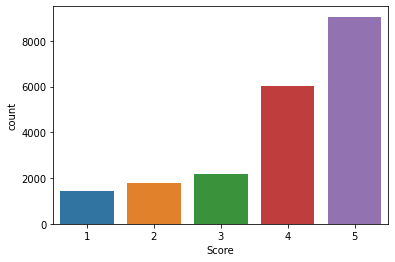

In [104]:
sns.countplot(df['Score'])

# Covert Score vale in -1 or 1
   where 1 = Positive or -1 = negative  

In [146]:
df['Score']=df['Score'].replace({(1,2,3):-1,(4,5):1})

In [147]:
df.head()

,Review,Score
0,nice hotel expen park got good deal stay hotel...,1
1,ok noth special charg diamond member hilton de...,-1
2,nice room experi hotel monaco seattl good hote...,-1
3,uniqu great stay wonder time hotel monaco loca...,1
4,great stay great stay went seahawk game awesom...,1


Text(0.5, 0, 'Negative Reviews = -1 , Positive Positive = 1')

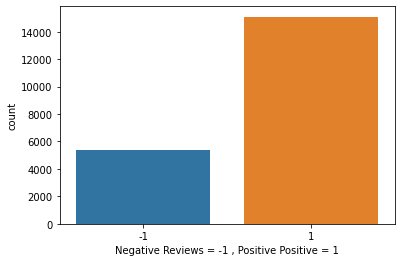

In [ ]:
sns.countplot(x='Score',data = df)
plt.xlabel('Negative Reviews = -1 , Positive Positive = 1' )

# Word Cloud

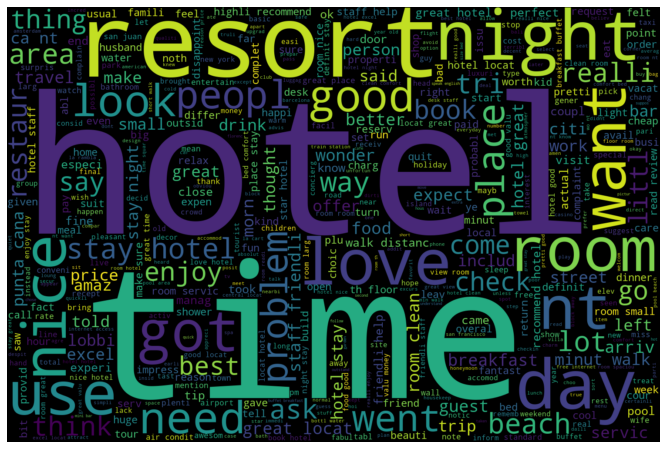

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['Review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Positive Reviews WordCloud

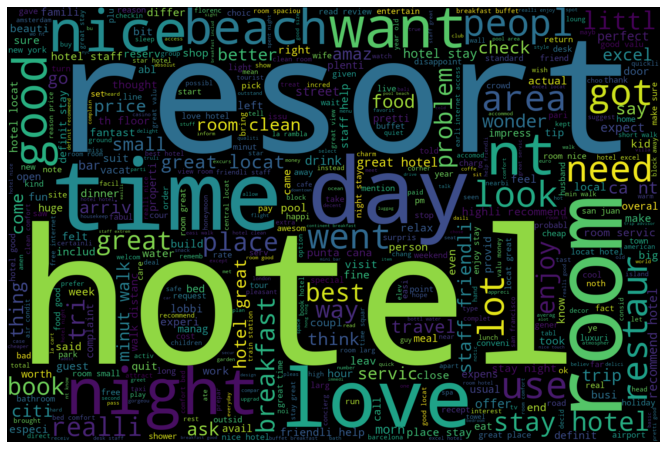

In [ ]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df[df['Score']==1].Review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Negative Reviews WorCloud

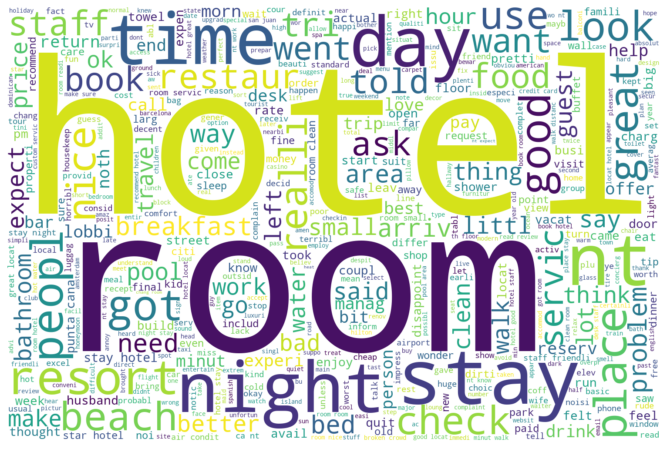

In [187]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="white",max_words=500, width=1500, height=1000).generate(' '.join(df[df['Score']==-1].Review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Most Frequent Word

In [109]:

a =Counter(" ".join(df['Review']).split()).most_common(20)
print(a)

[('hotel', 52976), ('room', 46385), ('stay', 28251), ('great', 21151), ('nt', 19007), ('good', 17127), ('staff', 16280), ('night', 14085), ('locat', 13642), ('nice', 13069), ('day', 12962), ('time', 12689), ('clean', 10746), ('servic', 10678), ('walk', 10203), ('restaur', 10127), ('beach', 10051), ('place', 9705), ('breakfast', 9665), ('like', 9494)]


In [110]:
mw =[]
c =[]
for i, j in a:
  mw.append(i)
  c.append(j) 

In [190]:
mfw= pd.DataFrame({'Most Frequent Word':mw,'Count':c})

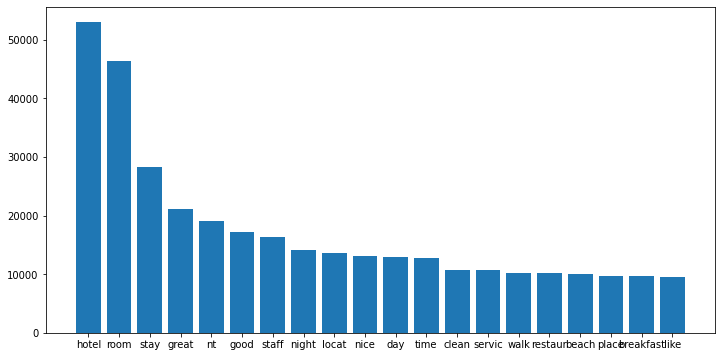

In [203]:
plt.figure(figsize=(12,6))
plt.bar(mfw['Most Frequent Word'],mfw['Count'])
plt.show()

Seprate independent variable

In [148]:
y = df.iloc[:,-1].values

In [149]:
print(y[:30])

[ 1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1  1  1  1
 -1 -1  1 -1  1  1]


#Split datasets

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [152]:
X_train.shape

(16392, 500)

#Naive Bayes Model

In [153]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [154]:
gmodel = GaussianNB()
mmodel = MultinomialNB()

In [155]:
gmodel.fit(X_train, y_train)
mmodel.fit(X_train, y_train)

MultinomialNB()

#Predict the Model

In [156]:
y_pred_gauss = gmodel.predict(X_test)
y_pred_gauss.shape

(4099,)

In [157]:
y_pred_multinom = mmodel.predict(X_test)
y_pred_multinom.shape

(4099,)

#Model Accuracy

In [158]:
from sklearn.metrics import accuracy_score
print("Gaussian", accuracy_score(y_test,y_pred_gauss))
print("Multinomial", accuracy_score(y_test,y_pred_multinom))


Gaussian 0.7858014149792633
Multinomial 0.8567943400829471


# Topic Modelling

In [159]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
grid_params = {'n_components' : list(range(5,10))}
# LDA model
lda_model = LatentDirichletAllocation(n_components=15,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='batch',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )


In [160]:
lda_output = lda_model.fit_transform(X)

In [161]:
print(lda_model) 

LatentDirichletAllocation(n_components=15, n_jobs=-1, random_state=100)


In [162]:
print("Log Likelihood: ", lda_model.score(X))

Log Likelihood:  -7499618.029935486


In [163]:
print("Perplexity: ", lda_model.perplexity(X))

Perplexity:  288.1517270658616


# Topic Modelling Using Grid Search CV

In [164]:
search_params = {'n_components': [5, 10, 15, 20], 'learning_decay': [.5, .7, .9]}

In [165]:
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params)
model.fit(X)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20]})

In [167]:
best_lda_model = model.best_estimator_
best_lda_model

LatentDirichletAllocation(learning_decay=0.9, n_components=5)

In [169]:
print("Model Perplexity: ", best_lda_model.perplexity(X))

Model Perplexity:  280.84761863825446


In [171]:
print("Best log likelihood Score for the LDA model",model.best_score_)

Best log likelihood Score for the LDA model -1502443.8165731211


In [179]:
lda_output = best_lda_model.transform(X)

In [176]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
dtm = np.matrix(X)
pyLDAvis.sklearn.prepare(best_lda_model,dtm,cv,mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  25.393054
2       51.163364 -159.968018       2        1  22.544114
1      -73.144554   21.523815       3        1  22.429837
3      -66.410133 -110.606438       4        1  16.352565
0       54.417324   12.443444       5        1  13.280429, topic_info=       Term          Freq         Total Category  logprob  loglift
211   hotel  52783.000000  52783.000000  Default  30.0000  30.0000
360  resort   8964.000000   8964.000000  Default  29.0000  29.0000
34    beach  10093.000000  10093.000000  Default  28.0000  28.0000
418    stay  28185.000000  28185.000000  Default  27.0000  27.0000
250   locat  13570.000000  13570.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
475    walk   1334.184741  10179.817608   Topic5  -4.8814  -0.0132
131   drink   1078.997176   4572.848330   Topic5  -5.0937   0.5748
481     way   1062.164342   4259.021524   Topic5  -5.1094   0.6301
244    like   1163.194373   9495.734587   Topic5  -5.0185  -0.0808
477    want   1063.737419   6673.115541   Topic5  -5.1079   0.1826

[320 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.307968  absolut
1         2  0.072955  absolut
1         3  0.102257  absolut
1         4  0.488563  absolut
1         5  0.028704  absolut
...     ...       ...      ...
499       1  0.317747     year
499       2  0.061252     year
499       3  0.128885     year
499       4  0.393994     year
499       5  0.097940     year

[1021 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 1])

# Topic List

In [178]:
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
print(topicnames)

['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4']


In [180]:
df_topic_keywords = pd.DataFrame(best_lda_model.components_/best_lda_model.components_.sum(axis=1)[:,np.newaxis])

In [182]:
df_topic_keywords.columns = cv.get_feature_names()

In [183]:
df_topic_keywords.index = topicnames

In [185]:
df_topic_keywords.head(5)

,abl,absolut,access,accommod,accomod,activ,actual,afternoon,air,airport,...,wife,window,wine,wish,wonder,work,world,worth,ye,year
Topic0,0.001504,0.000271,0.001812,0.000317,0.000068,0.000784,0.001443,0.002228,0.000843,0.011682,...,0.000794,0.000032,0.002111,0.000516,0.000580,0.003168,0.000697,0.002883,0.000651,0.001748
Topic1,0.001448,0.000576,0.001326,0.000491,0.000620,0.000075,0.002038,0.000154,0.002733,0.000076,...,0.000800,0.004521,0.000209,0.000395,0.000389,0.005702,0.000222,0.001393,0.001035,0.001361
Topic2,0.000923,0.000408,0.003361,0.000629,0.000419,0.000010,0.000503,0.000147,0.000875,0.002116,...,0.001105,0.001485,0.000397,0.000364,0.001639,0.000639,0.000340,0.001698,0.000265,0.000643
Topic3,0.001186,0.003773,0.000728,0.001323,0.001758,0.000250,0.000396,0.000903,0.000006,0.000082,...,0.001916,0.000393,0.002551,0.001308,0.012987,0.000730,0.001945,0.001959,0.000580,0.005703
Topic4,0.001285,0.001531,0.000089,0.000264,0.000315,0.003037,0.001423,0.000354,0.001684,0.000908,...,0.001598,0.000009,0.000687,0.000666,0.002982,0.004416,0.001119,0.002050,0.001563,0.002963
